<a href="https://colab.research.google.com/github/calzateu/Modeling_and_Simulation_4/blob/main/Our_Logistic_regression_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [461]:
import pandas as pd
from scipy import linalg as LA

In [462]:
data = pd.read_csv('Dataset-with-sentiments.csv')
data.head(5)

,Video ID,Comment ID,comments,Likes,polarity,pol_cat,stop_comments
0,MwpMEbgC7DA,UgzSCaG-BeNW0LkW2px4AaABAg,that s beautiful,0,0.850000,1,beautiful
1,MwpMEbgC7DA,Ugw6J6RLt2VGaKMAz4h4AaABAg,imagine being able to listen to this so...,176,0.375000,1,imagine able listen song like first time ever ...
2,MwpMEbgC7DA,UgwyFvqt1jZGR1l32sl4AaABAg,i've memorized this song more than math ...,4,0.333333,1,'ve memorized song math equations think song m...
3,MwpMEbgC7DA,UgzzG2fg2Aq8HjJAQUB4AaABAg,every time i listen to this reminds me ...,0,0.850000,1,every time listen reminds tvd elena damon rain...
4,MwpMEbgC7DA,Ugwx9ephHmJlIN8Sc614AaABAg,forever my cry song,2,0.000000,0,forever cry song


In [463]:
sum(data['stop_comments'].isnull())


0

In [464]:
data = data[data['stop_comments'].notnull()]

In [465]:
sum(data['stop_comments'].isnull())

0

In [466]:
data['pol_cat']

0       1
1       1
2       1
3       1
4       0
       ..
1068    1
1069    1
1070    0
1071    0
1072    1
Name: pol_cat, Length: 1073, dtype: int64

In [467]:
data[data['pol_cat']==-1] = 0

In [468]:
data['pol_cat']

0       1
1       1
2       1
3       1
4       0
       ..
1068    1
1069    1
1070    0
1071    0
1072    1
Name: pol_cat, Length: 1073, dtype: int64

In [469]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1073 entries, 0 to 1072
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Video ID       1073 non-null   object 
 1   Comment ID     1073 non-null   object 
 2   comments       1073 non-null   object 
 3   Likes          1073 non-null   int64  
 4   polarity       1073 non-null   float64
 5   pol_cat        1073 non-null   int64  
 6   stop_comments  1073 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 67.1+ KB


In [470]:
data['stop_comments'] = data[['stop_comments']].astype(str)

In [471]:
from sklearn.model_selection import train_test_split

In [472]:
X_train,X_test,y_train,y_test = train_test_split(data['stop_comments'],data['pol_cat'],test_size = 0.2,random_state = 324)

In [473]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
vect = CountVectorizer()
tf_train = vect.fit_transform(X_train)
tf_test = vect.transform(X_test)

In [474]:
tf_train = tf_train.toarray()
tf_test = tf_test.toarray()

In [475]:
import numpy as np

from sklearn import datasets
from sklearn.linear_model import LogisticRegression as sklearnLogisticRegression

class LogisticRegression:
    """
            Purpose: To estimate Logistic regression parameters in Python.
            Inputs:
                alpha           : Is the optimisation learning rate.
                maxIterations   : Maximum number of iterations for optimisation routine..
                fitIntercept    : Include the intercept in the model fit.
                verbose         : Display program information.
                optimisation    : The optimisation routine to use. Options are:
                                            gradientAscent
                                            newton
    """
    def __init__(self, alpha=0.01, maxIterations=100000, fitIntercept=True, verbose=False,optimisation="gradientAscent"):
        self.alpha = alpha
        self.maxIterations = maxIterations  # Maximum number of times to run the optimisation.
        self.numIterations = 0;             # Record the number of iterations performed.
        self.hasConverged = False;          # This variable is used to terminate the iterations searching for optimum parameters.
        self.fitIntercept = fitIntercept
        self.verbose = verbose
        self.costHistory = [];
        self.tolerance = tol=0; # convergence tolerance;
        self.theta=[];
        self.optimisation = optimisation;

    def __add_intercept(X):
        X = X.reshape(len(X), -1)
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)

    def __sigmoid(z):
        return 1 / (1 + np.exp(-z))


    def __cost(self, X, y, theta):
        # Purpose: Logistic regression log cost function.
        z = np.dot(X, theta)
        p = LogisticRegression.__sigmoid(z)
        return (-y * np.log(p) - (1 - y) * np.log(1 - p)).mean()

    def gradientAscent(X,y,theta,alpha):
        z = np.dot(X, theta)
        p = LogisticRegression.__sigmoid(z)
        gradient = np.dot(X.T, (p - y)) / y.size;  # 1st derivative of log likelihood wrt parameters.
        theta -= alpha * gradient  # Update the parameters.

        return theta;
    
    def gradientAscent2(X,y,theta,alpha):
        z = np.dot(X, theta)
        p = LogisticRegression.__sigmoid(z)
        aux = np.dot(X.T, (p - y))
        r = np.median(np.abs(aux[aux != 0]))
        # print(r)
        if r == 0:
          r = 1/y.size;
        gradient = r*np.dot(X.T, (p - y));  # 1st derivative of log likelihood wrt parameters.
        #print(gradient)
        theta -= alpha * gradient  # Update the parameters.

        return theta;

    def newton(X,y,theta,useRegulisation=False,regulisationParameter=0):
        """ Newton optimisation method."""
        z = np.dot(X, theta)
        p = LogisticRegression.__sigmoid(z)
        W = np.diag(p * (1 - p))
        hessian = X.T.dot(W).dot(X);

        
        eig_vals, eig_vects = LA.eig(hessian)

        print(len(eig_vals))
        val = np.max(eig_vals)
        #val = 2

        if val < 0:
          val *= -1

        val = 1/val;
        print(val)

        a = np.zeros((len(hessian), len(hessian))) #Inicializo una matriz
        np.fill_diagonal(a, np.linalg.norm(val)) # Relleno la diagonal con un valor especifico

        #print(a[0,0], np.linalg.norm(val))
        hessian = hessian + a
        

        gradient = np.dot(X.T, (y-p));  # 1st derivative of log likelihood wrt parameters.

        '''
        try:
            if useRegulisation:
                step = np.dot(np.linalg.inv(hessian + regulisationParameter * np.eye(theta)), grad)
            else:
                step = np.dot(np.linalg.inv(hessian), gradient)
        except np.linalg.LinAlgError:
            step=0;'''
        
        #print(hessian)
        print(hessian.shape)
        #print(hessian[0,0])
        hs = np.linalg.inv(hessian)
        print(hs)
        step = np.dot(hs, gradient)

        ## update the weights
        theta = theta + step

        print(theta)


        return theta;

    def fit(self, X, y):
        if self.fitIntercept:
            X = LogisticRegression.__add_intercept(X=X)


        self.theta = np.zeros(X.shape[1]);  # Initialise weights.
        alpha=self.alpha;

        cost = self.__cost(X, y, self.theta);  # Calculate the cost.
        self.costHistory.append(cost);  # Record the intitial cost for plotting.


        iterCount=0;

        while not self.hasConverged:
            # Perform the optimisation many times to reduce the cost by improving the parameters.
            iterCount+=1;                       # Counter for the number of optimisation iterations.

            # Depending on the optimisation approach. Calculate the coeffient update step differently.
            if self.optimisation=="gradientAscent":
                theta = LogisticRegression.gradientAscent(X,y,self.theta,self.alpha)
                iterDisplayVerbose = 1000;
            elif self.optimisation=="newton":
                theta = LogisticRegression.newton(X, y, self.theta)
                iterDisplayVerbose = 1;             # The number of iteration steps is significantly less than Gradient Ascent.
            elif self.optimisation=="gradientAscent2":
                theta = LogisticRegression.gradientAscent2(X,y,self.theta,self.alpha)
                iterDisplayVerbose = 1000;
            else:
                assert "unknown optimisation routine."
                return;

            cost = self.__cost(X,y, theta);     # Calculate the cost.


            if iterCount>1:
            # Only check to terminate optimisation after performing the second optimisation calculation.
                hasConverged = self.__checkConvergence(self.costHistory[-1], cost, self.tolerance,iterCount);  # Check if should terminate iteration updates as convergence tolerance has been reached.

                if hasConverged.hasConverged==True:
                    print("Iteration #:  {:>7,.0f}.  Cost: {:>+7.4f}.".format(iterCount, cost));
                    print("Finished because {}. Using {} optimisation method.".format(hasConverged.reason, self.optimisation));
                    self.numIterations = iterCount;
                    self.hasConverged == True;

                if (self.verbose == True and iterCount % iterDisplayVerbose == 0) and  hasConverged.hasConverged==False:
                    # Print out the log output.
                    print("Iteration #:  {:>7,.0f}.  Cost: {:>+7.4f}".format(iterCount, cost));


            if iterCount < 2:

                if (self.verbose == True and iterCount % iterDisplayVerbose == 0):
                    # Print out the log output.
                    print("Iteration #:  {:>7,.0f}.  Cost: {:>+7.4f}".format(iterCount, cost));

                self.theta = theta;
                self.costHistory.append(cost);  # Record the cost for plotting.
            else:
                if not (((self.optimisation == "newton") and (cost > self.costHistory[-1])) or (np.isnan(cost))) or iterCount<1:
                    # The Newton method on the last step can give coefficients well off and a worse cost as close to the singularity.
                    # Because of this. Not recording the last theta and cost found in this case and using the previous one.
                    self.theta = theta;
                    self.costHistory.append(cost);  # Record the cost for plotting.


    def __checkConvergence(self,previousCost, cost, tolerance, iterCount):
        ''' Purpose: Checks if coefficients have converged.
            Returns True if they have converged, False otherwise.'''
        costChange = np.abs(previousCost - cost)

        self.reason="";
        self.hasConverged=False;
        if (np.any(costChange < tolerance)):
            self.reason = "cost function tolerance reached";
            self.hasConverged = True;

        # If havn't reached thresholds, perform more iterations (keep training).
        if (iterCount > self.maxIterations):
            self.reason="maximum iterations reached"
            self.hasConverged = True;


        if (self.optimisation == "newton"):
            if (np.isnan(cost)):
                # The Newton method on the last step can give coefficients well off and a worse cost as close to the singularity.
                # Because of this. Not recording the last theta and cost found in this case and using the previous one.
                self.reason="singular Hessian"
                self.hasConverged = True;
            elif (cost > previousCost):
                # The Newton method on the last step can give coefficients well off and a worse cost as close to the singularity.
                # Because of this. Not recording the last theta and cost found in this case and using the previous one.
                self.reason="cost function worsoning as close to solution"
                self.hasConverged = True;



        return self


    def predict_prob(X,theta,fitIntercept=True):
        if fitIntercept:
            X = LogisticRegression.__add_intercept(X=X)

        return LogisticRegression.__sigmoid(np.dot(X, theta))

    def predict(self, X):
        #return LogisticRegression.predict_prob((X).round(),self.theta,self.fitIntercept)
        prob = LogisticRegression.predict_prob((X).round(),self.theta,self.fitIntercept)
        if (prob > 0.5):
          return 1
        return 0

    def formattedOutput(objLogisticRegression):
        """
        Purpose: To produce readable output summary of the results.
            Input:
                LogisticRegression  : A class instance containing the fitted information.
        """
        optimisationMethod=objLogisticRegression.optimisation;
        theta=objLogisticRegression.theta;
        inititialCost=objLogisticRegression.costHistory[0];
        finalCost=objLogisticRegression.costHistory[-1];
        numIterations=objLogisticRegression.numIterations;


        dash = '=' * 80; #chr(10000)*50
        print(dash)
        print("LOGISTIC REGRESSION USING {0} TERRMINATION RESULTS".format(optimisationMethod.upper()))
        print(dash)
        print("Initial Weights were:    {:>12.1f}, {:>2.1f}, {:>2.1f}.".format(0, 0, 0))
        print("   With initial cost:    {:>+12.6f}.".format(inititialCost))
        print("        # Iterations:    {:>+12,.0f}.    ".format(numIterations))
        print("       Final weights:    theta0:{:>+0.2f}, theta1:{:>+3.2f}, theta02:{:>+3.3f}.".format(
            theta[0], theta[1], theta[2]))#print("       Final weights:    \u03F4\u2080:{:>+0.2f}, \u03F4\u2081:{:>+3.2f}, \u03F4\u2082:{:>+3.3f}.".format(theta[0], theta[1], theta[2]))
        print("          Final cost:    {:>+12.6f}.".format(finalCost))
        print(dash)


In [476]:
a = [1,0,1,0,0,3,2]
b = a[a != 0]
print(b)

0


In [477]:
tf_train.shape

(858, 1770)

In [478]:
tf_test.shape

(215, 1770)

In [479]:
tf_train = tf_train

In [480]:
corr_matrix = np.corrcoef(tf_train)
sumas = sum(corr_matrix >= 0.5)
indices = sumas > 1
tf_train = tf_train[~indices]

y_train = y_train[~indices]

tf_train.shape, y_train.shape

((365, 1770), (365,))

In [481]:
tf_train = tf_train

In [482]:
tf_train.shape

(365, 1770)

In [483]:
tf_test.shape

(215, 1770)

In [484]:
'''def run():

    #
    ## Load Data:
    #iris = datasets.load_iris()
    #X = iris.data[:, :2]
    #y = (iris.target != 0) * 1
    #

    X = tf_train
    y = y_train


    # Run the model:
    objLogisticRegression = LogisticRegression(alpha=0.1, maxIterations=10,fitIntercept=True, verbose=True,optimisation="newton");   # Initialise the regression.
    objLogisticRegression.fit(X, y);                                 # Fit the regression.

    # Show the output:
    LogisticRegression.formattedOutput(objLogisticRegression=objLogisticRegression);        # Show the formatted results.


    #
    # Run the model:
    #objLogisticRegression = LogisticRegression(alpha=0.1, maxIterations=100000,fitIntercept=True, verbose=True,optimisation="gradientAscent");   # Initialise the regression.
    #objLogisticRegression.fit(X, y);                                 # Fit the regression.

    # Show the output:
    #LogisticRegression.formattedOutput(objLogisticRegression=objLogisticRegression);        # Show the formatted results.
    #

    # sklearn's Logistic Regression.
    model = sklearnLogisticRegression(C=1e8).fit(X, y)
    dash = '=' * 80;  # '=' * 80;
    print(dash)
    print("LOGISTIC REGRESSION USING SKLEARN TERMINATION RESULTS")
    print("Final weights:    theta0:{:>+0.2f}, theta1:{:>+0.2f}, theta2:{:>+0.2f}.".format(model.intercept_[0], model.coef_[0][0], model.coef_[0][1]))
    print(dash)



    print("Finished")





if __name__ == '__main__':
    run()'''

'def run():\n\n    #\n    ## Load Data:\n    #iris = datasets.load_iris()\n    #X = iris.data[:, :2]\n    #y = (iris.target != 0) * 1\n    #\n\n    X = tf_train\n    y = y_train\n\n\n    # Run the model:\n    objLogisticRegression = LogisticRegression(alpha=0.1, maxIterations=10,fitIntercept=True, verbose=True,optimisation="newton");   # Initialise the regression.\n    objLogisticRegression.fit(X, y);                                 # Fit the regression.\n\n    # Show the output:\n    LogisticRegression.formattedOutput(objLogisticRegression=objLogisticRegression);        # Show the formatted results.\n\n\n    #\n    # Run the model:\n    #objLogisticRegression = LogisticRegression(alpha=0.1, maxIterations=100000,fitIntercept=True, verbose=True,optimisation="gradientAscent");   # Initialise the regression.\n    #objLogisticRegression.fit(X, y);                                 # Fit the regression.\n\n    # Show the output:\n    #LogisticRegression.formattedOutput(objLogisticRegression=o

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
25      0
528     1
127     1
1057    0
409     1
       ..
596     0
849     1
1067    1
752     0
665     0
Name: pol_cat, Length: 365, dtype: int64
1770
(0.0026081351580566994+0j)
(1770, 1770)
[[ 3.83415713e+02  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  2.86686584e+02  1.05608583e+01 ...  4.83077721e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.05608583e+01  2.48992866e+02 ... -1.86625061e-01
   0.00000000e+00  0.00000000e+00]
 ...
 [ 0.00000000e+00  4.83077721e+00 -1.86625061e-01 ...  3.20717305e+02
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   3.83415713e+02  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  3.83415713e+02]]
[ 0.         -0.40003067  0.63183527 ...  0.0039

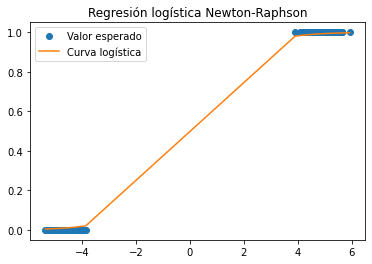

In [485]:
import matplotlib.pyplot as plt

X = tf_train
y = y_train

print(X)
print(y)
# cc = np.cov(X)

# print('Matriz de covarianzas inicial\n', cc)

# Run the model:
objLogisticRegression = LogisticRegression(alpha=0.1, maxIterations=3,fitIntercept=False, verbose=True,optimisation="newton");   # Initialise the regression.
objLogisticRegression.fit(X, y);                                 # Fit the regression.

thet = objLogisticRegression.theta

toPx = np.dot(X, thet)

zf = 1 / (1 + np.exp(-toPx))

# print(toPx)
# print(zf)
# print(toPx.shape)
# print(zf.shape)
conc = [toPx.T, zf.T]
# print(conc)
conc = np.sort(conc)
ss1 = conc[0,:]
ss2 = conc[1,:]

plt.plot(toPx,y, 'o')
plt.plot(ss1, ss2)
plt.legend(['Valor esperado','Curva logística'])
plt.title("Regresión logística Newton-Raphson")

# Show the output:
LogisticRegression.formattedOutput(objLogisticRegression=objLogisticRegression);        # Show the formatted results.

In [486]:
#corr_matrix = np.corrcoef(tf_test)
#sumas = sum(corr_matrix >= 0.5)
#indices = sumas > 1
#tf_test = tf_test[~indices]

#y_test = y_ttest[~indices]

#tf_test.shape, y_test.shape

In [487]:
tf_test.shape

(215, 1770)

In [488]:
tf_train.shape

(365, 1770)

In [489]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

from sklearn import metrics

In [490]:
correctos = 0

y_train = list(y_train)

predicciones = []
for i in range(len(tf_train)):
  prediccion = objLogisticRegression.predict(tf_train[i])
  #print(prediccion)
  if (prediccion == y_train[i]):
    correctos += 1

  predicciones.append(prediccion)
print(f'Accuraccy: {correctos/len(tf_train)}')

Accuraccy: 1.0


[[169   0]
 [  0 196]]


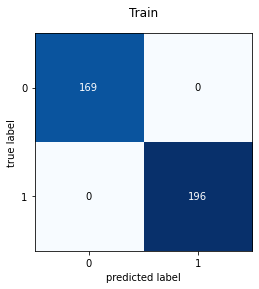

In [491]:
cf = metrics.confusion_matrix(y_train,predicciones,labels = [1,0])
print(cf)
## this command is only for google collab 
## in the below figure " 1 is actually showing -1 and 0 is actually showing 1"
fig, ax = plot_confusion_matrix(conf_mat = cf)
                                
## It canbe used in any platform
# fig, ax = plot_confusion_matrix(conf_mat = cf, class_names = [1,-1])
plt.title("Train")
plt.show()

In [492]:
correctos = 0

y_test = list(y_test)

predicciones_test = []
for i in range(len(tf_test)):
  prediccion = objLogisticRegression.predict(tf_test[i])
  #print(prediccion)
  if (prediccion == y_test[i]):
    correctos += 1

  predicciones_test.append(prediccion)
print(f'Accuraccy: {correctos/len(tf_test)}')

Accuraccy: 0.6744186046511628


[[73 30]
 [40 72]]


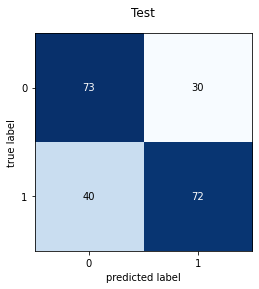

In [493]:
cf = metrics.confusion_matrix(y_test,predicciones_test,labels = [1,0])
print(cf)
## this command is only for google collab 
## in the below figure " 1 is actually showing -1 and 0 is actually showing 1"
fig, ax = plot_confusion_matrix(conf_mat = cf)
                                
## It canbe used in any platform
# fig, ax = plot_confusion_matrix(conf_mat = cf, class_names = [1,-1])
plt.title("Test")
plt.show()

Iteration #:    1,000.  Cost: +0.3552
Iteration #:    2,000.  Cost: +0.2583
Iteration #:    3,000.  Cost: +0.2050
Iteration #:    3,001.  Cost: +0.2050.
Finished because maximum iterations reached. Using gradientAscent optimisation method.
LOGISTIC REGRESSION USING GRADIENTASCENT TERRMINATION RESULTS
Initial Weights were:             0.0, 0.0, 0.0.
   With initial cost:       +0.693147.
        # Iterations:          +3,001.    
       Final weights:    theta0:+0.00, theta1:-0.18, theta02:+0.356.
          Final cost:       +0.204978.


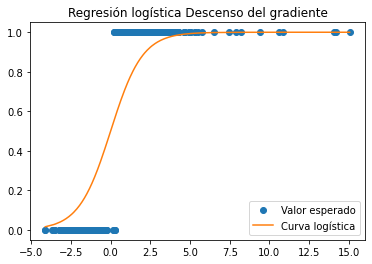

In [494]:
# Run the model:
objLogisticRegression1 = LogisticRegression(alpha=0.1, maxIterations=3000,fitIntercept=False, verbose=True,optimisation="gradientAscent");   # Initialise the regression.
objLogisticRegression1.fit(X, y);                                 # Fit the regression.

thet = objLogisticRegression1.theta

toPx = np.dot(X, thet)

zf = 1 / (1 + np.exp(-toPx))

# print(toPx)
# print(zf)
# print(toPx.shape)
# print(zf.shape)
conc = [toPx.T, zf.T]
# print(conc)
conc = np.sort(conc)
ss1 = conc[0,:]
ss2 = conc[1,:]

plt.plot(toPx,y, 'o')
plt.plot(ss1, ss2)
plt.legend(['Valor esperado','Curva logística'])
plt.title("Regresión logística Descenso del gradiente")

# Show the output:
LogisticRegression.formattedOutput(objLogisticRegression=objLogisticRegression1);        # Show the formatted results.

In [495]:
correctos = 0

y_train = list(y_train)

predicciones = []
for i in range(len(tf_train)):
  prediccion = objLogisticRegression1.predict(tf_train[i])
  #print(prediccion)
  if (prediccion == y_train[i]):
    correctos += 1

  predicciones.append(prediccion)
print(f'Accuraccy: {correctos/len(tf_train)}')

Accuraccy: 0.989041095890411


[[169   0]
 [  4 192]]


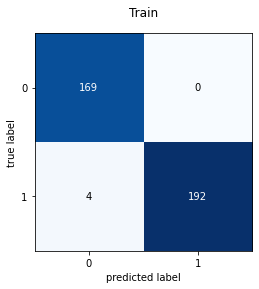

In [496]:
cf = metrics.confusion_matrix(y_train,predicciones,labels = [1,0])
print(cf)
## this command is only for google collab 
## in the below figure " 1 is actually showing -1 and 0 is actually showing 1"
fig, ax = plot_confusion_matrix(conf_mat = cf)
                                
## It canbe used in any platform
# fig, ax = plot_confusion_matrix(conf_mat = cf, class_names = [1,-1])
plt.title("Train")
plt.show()

In [497]:
correctos = 0

y_test = list(y_test)

predicciones_test = []
for i in range(len(tf_test)):
  prediccion = objLogisticRegression1.predict(tf_test[i])
  #print(prediccion)
  if (prediccion == y_test[i]):
    correctos += 1

  predicciones_test.append(prediccion)
print(f'Accuraccy: {correctos/len(tf_test)}')

Accuraccy: 0.7674418604651163


[[80 23]
 [27 85]]


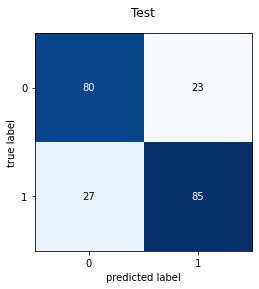

In [498]:
cf = metrics.confusion_matrix(y_test,predicciones_test,labels = [1,0])
print(cf)
## this command is only for google collab 
## in the below figure " 1 is actually showing -1 and 0 is actually showing 1"
fig, ax = plot_confusion_matrix(conf_mat = cf)
                                
## It canbe used in any platform
# fig, ax = plot_confusion_matrix(conf_mat = cf, class_names = [1,-1])
plt.title("Test")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log


Iteration #:    1,000.  Cost: +0.0554
Iteration #:    2,000.  Cost: +0.0395
Iteration #:    3,000.  Cost: +0.0324
Iteration #:    3,001.  Cost: +0.0324.
Finished because maximum iterations reached. Using gradientAscent2 optimisation method.
LOGISTIC REGRESSION USING GRADIENTASCENT2 TERRMINATION RESULTS
Initial Weights were:             0.0, 0.0, 0.0.
   With initial cost:       +0.693147.
        # Iterations:          +3,001.    
       Final weights:    theta0:+0.00, theta1:-0.42, theta02:+1.149.
          Final cost:       +0.032433.


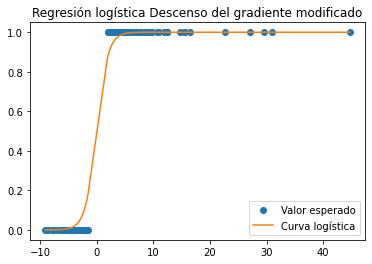

In [499]:
# Run the model:
objLogisticRegression2 = LogisticRegression(alpha=0.1, maxIterations=3000,fitIntercept=False, verbose=True,optimisation="gradientAscent2");   # Initialise the regression.
objLogisticRegression2.fit(X, y);                                 # Fit the regression.

thet = objLogisticRegression2.theta

toPx = np.dot(X, thet)

zf = 1 / (1 + np.exp(-toPx))

# print(toPx)
# print(zf)
# print(toPx.shape)
# print(zf.shape)
conc = [toPx.T, zf.T]
# print(conc)
conc = np.sort(conc)
ss1 = conc[0,:]
ss2 = conc[1,:]

plt.plot(toPx,y, 'o')
plt.plot(ss1, ss2)
plt.legend(['Valor esperado','Curva logística'])
plt.title("Regresión logística Descenso del gradiente modificado")

# Show the output:
LogisticRegression.formattedOutput(objLogisticRegression=objLogisticRegression2);        # Show the formatted results.

In [500]:
correctos = 0

y_train = list(y_train)

predicciones = []
for i in range(len(tf_train)):
  prediccion = objLogisticRegression2.predict(tf_train[i])
  #print(prediccion)
  if (prediccion == y_train[i]):
    correctos += 1

  predicciones.append(prediccion)
print(f'Accuraccy: {correctos/len(tf_train)}')

Accuraccy: 1.0


[[169   0]
 [  0 196]]


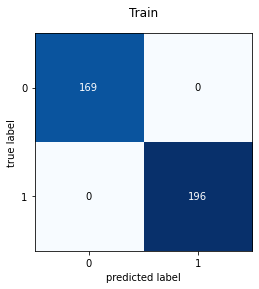

In [501]:
cf = metrics.confusion_matrix(y_train,predicciones,labels = [1,0])
print(cf)
## this command is only for google collab 
## in the below figure " 1 is actually showing -1 and 0 is actually showing 1"
fig, ax = plot_confusion_matrix(conf_mat = cf)
                                
## It canbe used in any platform
# fig, ax = plot_confusion_matrix(conf_mat = cf, class_names = [1,-1])
plt.title("Train")
plt.show()

In [502]:
correctos = 0

y_test = list(y_test)

predicciones_test = []
for i in range(len(tf_test)):
  prediccion = objLogisticRegression2.predict(tf_test[i])
  #print(prediccion)
  if (prediccion == y_test[i]):
    correctos += 1

  predicciones_test.append(prediccion)
print(f'Accuraccy: {correctos/len(tf_test)}')

Accuraccy: 0.7581395348837209


[[79 24]
 [28 84]]


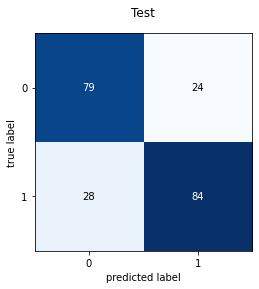

In [503]:
cf = metrics.confusion_matrix(y_test,predicciones_test,labels = [1,0])
print(cf)
## this command is only for google collab 
## in the below figure " 1 is actually showing -1 and 0 is actually showing 1"
fig, ax = plot_confusion_matrix(conf_mat = cf)
                                
## It canbe used in any platform
# fig, ax = plot_confusion_matrix(conf_mat = cf, class_names = [1,-1])
plt.title("Test")
plt.show()

<function matplotlib.pyplot.show>

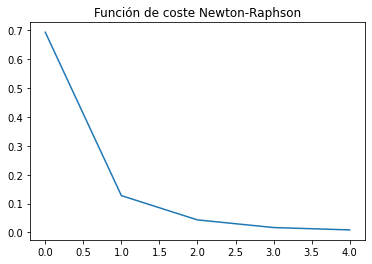

In [504]:
plt.plot(objLogisticRegression.costHistory)
plt.title("Función de coste Newton-Raphson")
plt.show

<function matplotlib.pyplot.show>

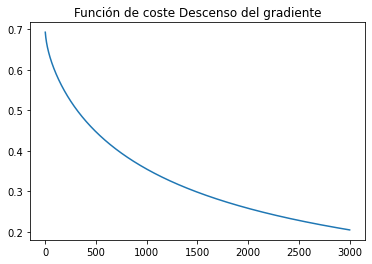

In [505]:
plt.plot(objLogisticRegression1.costHistory)
plt.title("Función de coste Descenso del gradiente")
plt.show

<function matplotlib.pyplot.show>

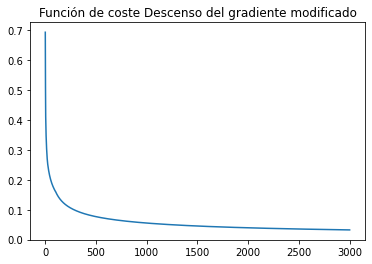

In [506]:
plt.plot(objLogisticRegression2.costHistory)
plt.title("Función de coste Descenso del gradiente modificado")
plt.show